In [81]:
import warnings;
warnings.filterwarnings('ignore');
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
dataset_path = 'Dataset/german_credit_data_dataset.csv'
raw_dataset = pd.read_csv(dataset_path)

In [16]:
raw_dataset.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2


In [26]:
raw_dataset.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


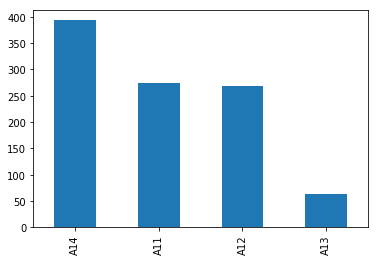

In [23]:
raw_dataset['checking_account_status'].value_counts().plot('bar')
plt.show()

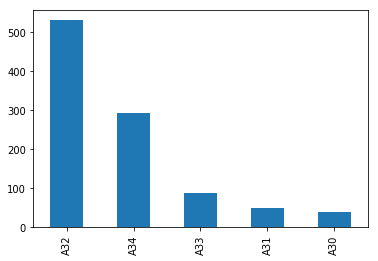

In [24]:
raw_dataset['credit_history'].value_counts().plot('bar')
plt.show()

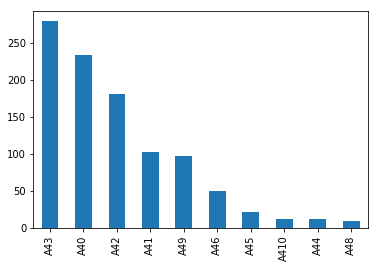

In [25]:
raw_dataset['purpose'].value_counts().plot('bar')
plt.show()

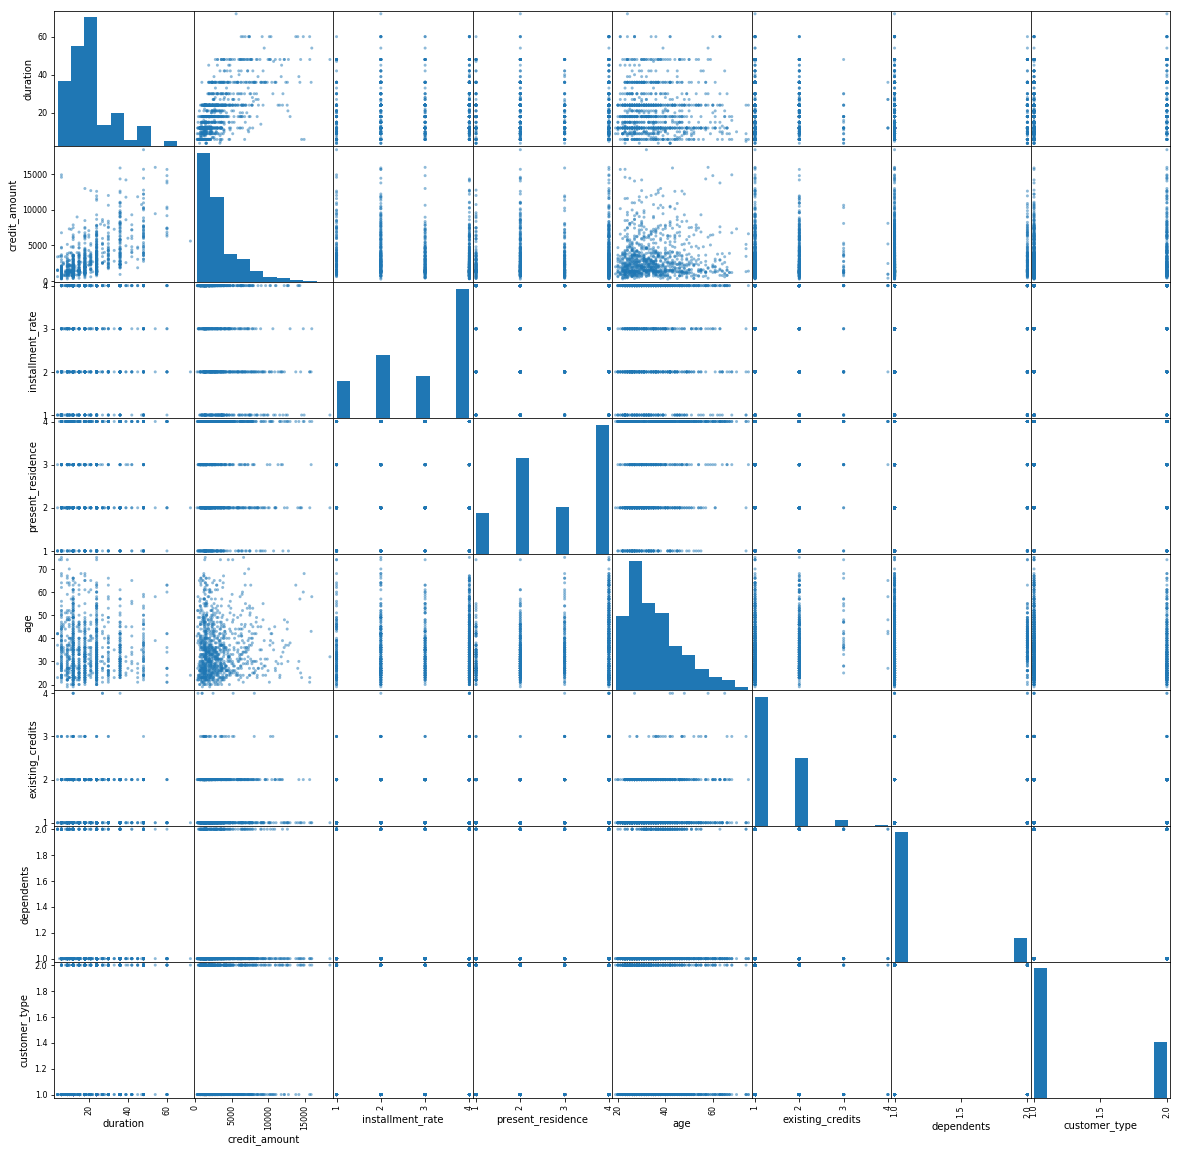

In [33]:
# Can select attributes we are interested
#attributes = ["age", "sex", "cp","chol"]
scatter_matrix(raw_dataset, figsize=(20, 20))
plt.show()

In [34]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_account_status    1000 non-null object
duration                   1000 non-null int64
credit_history             1000 non-null object
purpose                    1000 non-null object
credit_amount              1000 non-null float64
savings                    1000 non-null object
present_employment         1000 non-null object
installment_rate           1000 non-null float64
personal                   1000 non-null object
other_debtors              1000 non-null object
present_residence          1000 non-null float64
property                   1000 non-null object
age                        1000 non-null float64
other_installment_plans    1000 non-null object
housing                    1000 non-null object
existing_credits           1000 non-null float64
job                        1000 non-null object
dependents                 1000 non-null int64
telephone                  

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self._feature_names = feature_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X[self._feature_names]


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numerical_pipeline = Pipeline([
    ('select_numeric',FeatureSelector(['duration','credit_amount','installment_rate','present_residence','age']))
])

#numerical_pipeline.fit_transform(raw_dataset)

In [46]:
from sklearn.preprocessing import OneHotEncoder
categorical_pipeline = Pipeline([
    ('select_categoric',FeatureSelector(['checking_account_status','credit_history','purpose','savings','present_employment',
                                        'personal','other_debtors','property','other_installment_plans'])),
    ('cat_encoder',OneHotEncoder(sparse=False))
])

#categorical_pipeline.fit_transform(raw_dataset)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

label_pipeline = Pipeline([
    ('select_label',FeatureSelector(['customer_type']))
])


In [54]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline',numerical_pipeline),
    ('cat_pipeline',categorical_pipeline)
])

X_data = preprocess_pipeline.fit_transform(raw_dataset)
y_data = label_pipeline.fit_transform(raw_dataset)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20, random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
forest_scores.mean()

c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\alexf\appdata\local\programs\pytho

0.7537382319621859

In [61]:
forest_clf.fit(X_train,y_train )

c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
predicted = forest_clf.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted,[1,2])

In [66]:
conf_matrix

array([[135,   6],
       [ 32,  27]], dtype=int64)

In [70]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
svm_scores.mean()


c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\alexf\appdata\local\programs\python\python37\lib\site-packages\skle

0.6987609379272628

In [82]:
names = ["Nearest Neighbors",  "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(name)
    print(scores.mean())
    
    clf.fit(X_train,y_train )
    predicted = clf.predict(X_test)
    
    target_names = ['good','bad']
    #conf_matrix = confusion_matrix(y_test, predicted)
    print(classification_report(y_test, predicted, target_names=target_names))
    print('\n')

Nearest Neighbors
0.6550961463338412
              precision    recall  f1-score   support

        good       0.73      0.87      0.79       141
         bad       0.42      0.24      0.30        59

   micro avg       0.68      0.68      0.68       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.64      0.68      0.65       200



Gaussian Process
0.5975326672916911
              precision    recall  f1-score   support

        good       0.73      0.82      0.77       141
         bad       0.39      0.27      0.32        59

   micro avg       0.66      0.66      0.66       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.63      0.66      0.64       200



Decision Tree
0.6662293937263175
              precision    recall  f1-score   support

        good       0.80      0.81      0.81       141
         bad       0.53      0.53      0.53        59

   micro avg       0.72      0.72      0.73       200
   macro avg      